## Pacotes Utilizados:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings; 
warnings.simplefilter('ignore')

## Hiperplano linear de separação para classificação binária

A classificação binária consiste na separação de dados entre duas classes utilizando um hiperplano no espaço formado pela características dos dados. Para observar como essa separação pode ser feita utilizando machine learning, dois algoritmos de classificação linear serão utilizados:

1. Algoritmo do Perceptron de Rosemblat
1. Máquina de Vetor de Suporte Linear

Os dados pertencentes ao conjunto de treinamento possuem três características e são dispostos abaixo:

Classe 1 | Classe 2
--------- | ---------
(0, 0, 0) | (0, 0, 1)
(1, 0, 0) | (0, 1, 1)
(1, 0, 1) | (0, 1, 0)
(1, 1, 0) | (1, 1, 1)



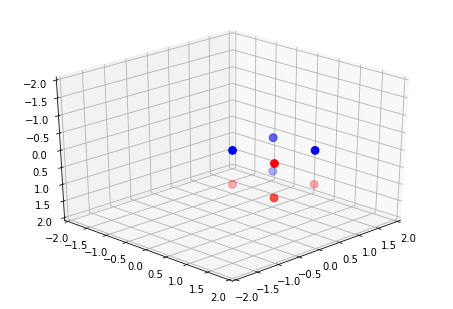

In [16]:
data_q1_a = np.array([[0, 0, 0],
                [1, 0, 0],
                [1, 0, 1],
                [1, 1, 0],
                [0, 0, 1],
                [0, 1, 1],
                [0, 1, 0],
                [1, 1, 1]])
classes_q1_a = np.array([0, 0, 0, 0, 1, 1, 1, 1])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-45)
ax.set_zlim(bottom= -2, top=2)
ax.set_xlim(left= -2, right=2)
ax.set_ylim(bottom= -2, top=2)
mask = classes_q1_a == 0
ax.scatter(data_q1_a[mask, 0], data_q1_a[mask, 1], data_q1_a[mask, 2], c='b', s=60)
_ = ax.scatter(data_q1_a[~mask, 0], data_q1_a[~mask, 1], data_q1_a[~mask, 2], c='r', s=60)

É possível observar que os dados formam um cubo no espaço tridimensional e é possível separá-los com um plano atravessando suas arestas.

Para criar o plano de separação serão utilizadas as classes [Perceptron](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron) e [SVR](http://scikit-learn.org/stable/modules/svm.html) da biblioteca scikit-learn.

In [3]:
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC

## O perceptron de rosemblat

O perceptron de rosemblat busca encontrar um plano de divisão dos dados de acordo com a formula:

\begin{equation}
    x \in \omega_{1}(\omega_{2}), \quad \textrm{se} \quad W^T \cdot x > 0 (< 0)
\end{equation}

Em que W é o vetor de pesos para cada característica e x é o vetor de características (valores do dado), resultando em uma equação de forma:

\begin{equation}
    W[0] \cdot x[0] + W[1] \cdot x[1] + W[2] \cdot x[2] + b = 0
\end{equation}

Ou seja, os pontos cujos valores sejam positivos ao serem aplicados no peso, serão considerados pertencente a uma classe e a outra caso sejam negativos

Na biblioteca scikit, os coeficientes (W) do hiperplano de separação são guardados no atributo *coef_* do modelo utilizado, enquanto a interseção (b) do subespaço formado pelas características é guardado em *intercept_*

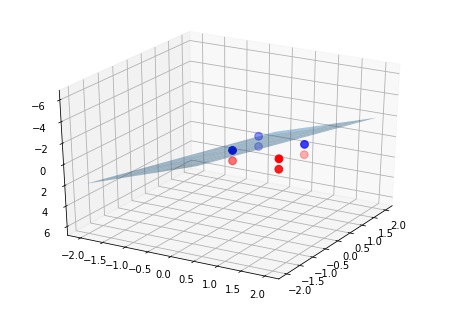

In [4]:
# Faz o treinamento do perceptron nos dados e obtem os coeficientes do hiperplano
perceptron_q1 = Perceptron().fit(data_q1_a, classes_q1_a)
coefs_q1, intercept_q1 = perceptron_q1.coef_.ravel(), perceptron_q1.intercept_

figure = plt.figure()
axis = Axes3D(figure, elev=-152, azim=-30)

# Cria dois vetores com valores linearmente espaçados em [-2, 2]
xp = np.linspace(-2, 2, 50)
yp = np.linspace(-2, 2, 50)

# Cria um grid retangular de valores para x e y para plotar plano linear
XP, YP = np.meshgrid(xp, yp)

# Calcula os valores do valor Z do hiperplano para cada um dos pontos x e y do grid retangular
ZP = (coefs_q1[0] * XP + coefs_q1[1] * YP + intercept_q1) / -coefs_q1[2]

# Plota a superficie do hiperplano e os pontos de cada classe
axis.plot_surface(XP, YP, ZP, rstride=9, cstride=9, alpha=0.4)
axis.scatter(data_q1_a[mask, 0], data_q1_a[mask, 1], data_q1_a[mask, 2], c='b', s=60)
_ = axis.scatter(data_q1_a[~mask, 0], data_q1_a[~mask, 1], data_q1_a[~mask, 2], c='r', s=60)

## A Máquina de Vetor de Suporte

A máquina de vetor de suporte atua de forma diferente do Perceptron de Rosemblat, mas também gera um hiperplano caso sua função de kernel seja linear. Ela busca encontrar um plano de divisão ótimo entre as classes levando em consideração alguns pontos de cada classe, chamados de vetores de suporte, para gerar a maior margem possível entre as classes.


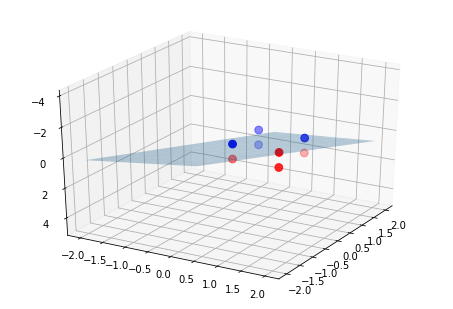

In [5]:
svm_linear = LinearSVC().fit(data_q1_a, classes_q1_a)
coefs_q1_a, intercept_q1_a = svm_linear.coef_.ravel(), svm_linear.intercept_

# Obtem uma figura para plotagem
figure = plt.figure()
axis = Axes3D(figure, elev=-152, azim=-30)
# para ver o plano de separação -> elev=-148 azim=-70

# Cria um vetor com valores linearmente espaçados em [-2, 2]
xx = np.linspace(-2, 2, 50)
yy = np.linspace(-2, 2, 50)

# Para cada valor X e Y do hiperplano, obtem o valor z correspondente que define o hiperplano no espaço tridimensional
XX, YY = np.meshgrid(xx, yy)
ZZ = (coefs_q1_a[0] * XX + coefs_q1_a[1] * YY + intercept_q1_a) / -coefs_q1_a[2]

# Plota a superficie e os pontos em cada classe (azul = classe 1, vermelho = classe 2)
axis.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
axis.scatter(data_q1_a[mask, 0], data_q1_a[mask, 1], data_q1_a[mask, 2], c='b', s=60)
_ = axis.scatter(data_q1_a[~mask, 0], data_q1_a[~mask, 1], data_q1_a[~mask, 2], c='r', s=60)

## Analise de convergência utilizando Rede Neurais

As redes neurais possuem diversos tipos de algoritmos de convergência que buscam minimizar o erro da predição em relação à um valor desejado. 

Para atualizar os pesos que definem os hiperplanos de separação dos dados, a rede neural de multiplas camadas (Multilayer Perceptron) utiliza o algoritmo de backpropagation para que com base no gradiente da função de erro, possam ser calculados novos pesos que levem a um mínimo local.

O gradiente utilizado no multilayer perceptron pode ser calculado de diversas formas, em que cada uma possui uma aplicação específica dependendo das restrições do conjunto de dados utilizado.

Para fazer uma análise de convergência do erro médio em cada uma das técnicas de calculo do gradiente, os seguintes algoritmos serão comparados:

- algoritmo da retropropagação com termo de momento (assumindo que a função de ativação seja tangente sigmoide)
- algoritmo do gradiente conjugado
- algoritmo de Marquand-Levenberg

E estes serão aplicados para fazer regressão nas seguintes funções:

função logic: 
\begin{equation}
    f(x_{1}, x_{2}, x_{3}) = x_{1} \oplus x_{2} \oplus x_{3}
\end{equation}

função func: 

\begin{equation}
 f(x) = \frac{\cos(2\pi x)}{1-(4x)^2}\cdot\frac{\sin (\pi x)}{\pi x} 
\end{equation}

função func2:

\begin{equation}
    f(x) = x_1^2 + x_2^2 + 2 x_1 x_2 \cos(\pi x_1 x_2) + x_1 + x_2 - 1 
\end{equation}

In [6]:
def logic(sample):
    return sample[0] ^ sample[1]^ sample[2]

def func(x):
    num = np.cos(2.0 * np.pi * x) * np.sin(np.pi * x)
    div = (1 - (4.0 * x) ** 2.0) * np.pi * x
    return num / div

def func2(vec):
    return vec[0] ** 2 + vec[1] ** 2 + 2 * vec[0] * vec[1] * np.cos(np.pi * vec[0] * vec[1]) + vec[0] + vec[1] - 1 

def erro_medio(predicao, atual):
    erros = [y_p - y for y_p, y in zip(predicao, atual)]
    return sum(erros) / len(erros)

def error_convergence(clf, X_train, y_train):
    # Cria um vetor que irá guardar os erros em cada iteração
    errors = []

    # Faz a predição por batchs para observar a convergência do erro medio
    for _ in range(20):
        for batch in range(20, X_train.shape[0], 20):
            endbatch = X_train.shape[0] if batch > X_train.shape[0] else batch
            X_batch = X_train[batch-20: endbatch]
            y_batch = y_train[batch-20: endbatch]
            if len(y_batch.shape) == 1:
                y_batch = y_batch.reshape(-1, 1)
            if len(X_batch.shape) == 1:
                X_batch = X_batch.reshape(-1, 1)

            # Une a matriz de características com os valores desejados para embaralha-los
            alldata = np.concatenate((X_batch, y_batch), axis=1) 
            np.random.shuffle(alldata)

            clf.partial_fit(alldata[:, :-1], alldata[:, -1])
            predicao = clf.predict(X_train)
            errors.append(erro_medio(predicao, target))
    return errors

### A função lógica xor entre três valores

A função lógica será calculada para todas as combinações 3 a 3 dos valores de [0, 10].

Forma da matriz de dados: (1000, 3)


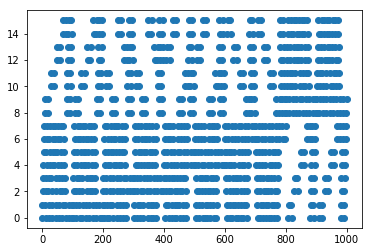

In [7]:
#data = np.random.randint(0, 100, size=(1000, 3))
                                       
xxor = list(range(10))
yxor = list(range(10))
zxor = list(range(10))
                                    
datalist = []
for xi in xxor:
    for yi in yxor:
        for zi in zxor:
            sample = [xi, yi, zi]
            datalist.append(sample)

data_q2 = np.array(datalist)
print("Forma da matriz de dados: {}".format(data_q2.shape))
target = np.apply_along_axis(logic, axis=1, arr=data_q2)
plt.scatter(range(len(target)), target, marker='o')
plt.show()

#### Análise da convergência do erro médio para a função lógica

O classe [MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor.score) do scikit implementa uma rede neural com parâmetros configuráveis. Alguns dos parâmetros são explicados abaixo:

- **activation:** função de ativação, nesse caso será utilizada a tangente hiperbólica.
- **hidden_layers_sizes:** Indica o tamanho da camadas escondidas da MLP
- **learning_rate:** indica o modo de atualização da taxa de aprendizagem. Pode ser constante, decrescente ou adaptativa
- **solver:** Modo de otimização do erro entre a resposta desejada e a predição 

O MLPRegressor utiliza backpropagation para atualizar os pesos da rede neural e o método de otimização do gradiente pode ser definido pelo parametro solver.

In [8]:
# Faz a divisão dos dados em conjuntos de treino e validação
X_train, X_test, y_train, y_test = train_test_split(data_q2, target) 

# Cria a rede neural perceptron de multiplas camadas
momento = 0.5
act_fn = "tanh"
clf = MLPRegressor(hidden_layer_sizes=(100), activation=act_fn, solver="sgd", momentum=momento)

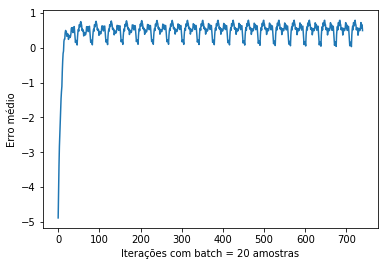

In [9]:
errors = error_convergence(clf, X_train, y_train)

plt.ylabel("Erro médio")
plt.xlabel("Iterações com batch = 20 amostras")
plt.plot(range(len(errors)), errors)
plt.show()

### Análise da convergência do erro médio para função 1

Para observar os valores de convergência do erro médio da função 1 serão gerados 1000 dados entre $0$ e $4\pi$, para os quais seus valores desejados serão aplicados na função 1 e após isso, será feita uma predição pela rede neural.

Lembrando que a função a ser aproximada é dada por:

\begin{equation}
    f(x) = \frac{\cos(2\pi x)}{1-(4x)^2}\cdot\frac{\sin (\pi x)}{\pi x}
\end{equation}

Uma representação gráfica da função a ser aproximada é mostrada abaixo

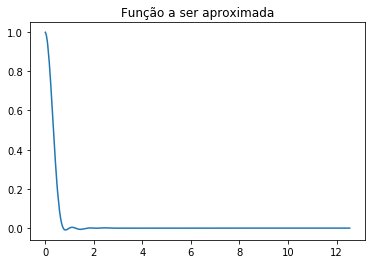

In [10]:
data_q2_b = np.sort(np.random.uniform(low=0, high=4 *np.pi, size=(1000)))
data_q2_b = data_q2_b.reshape(-1, 1)

# Escalonamento dos dados para entrada na rede neural
scaler_q2_b = StandardScaler().fit(data_q2_b)
scaled_q2_b = scaler_q2_b.transform(data_q2_b)

target_q2_b = np.apply_along_axis(func, 0, data_q2_b)

X_train, X_test, y_train, y_test = train_test_split(scaled_q2_b, target_q2_b, test_size=0.3)

plt.title("Função a ser aproximada")
plt.plot(data_q2_b, target_q2_b)
plt.show()

Score nos dados de treinamento: 0.3462591692050402
Score nos dados de teste: 0.38072353532626146


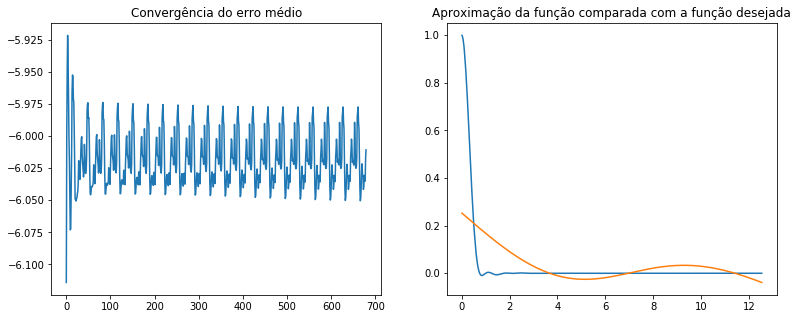

In [11]:
# Cria o modelo da rede neural utilizando função de ativação tangente hiperbólica
act_fn1 = "tanh"
momento = 0.9
clf_func1 = MLPRegressor(hidden_layer_sizes=(40, 10, 10), activation=act_fn1, solver="sgd", learning_rate="constant", learning_rate_init=0.03 , momentum=momento)

# Calculando os erros para fazer a convergência
erros_func1 = error_convergence(clf_func1, X_train, y_train)
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

axes[0].set_title("Convergência do erro médio")
axes[0].plot(range(len(erros_func1)), erros_func1)

# Comparacao entre predicao e funcao atual
pred_func1 = clf_func1.predict(scaled_q2_b)
axes[1].set_title("Aproximação da função comparada com a função desejada")
axes[1].plot(data_q2_b.ravel(), target_q2_b.ravel())
axes[1].plot(data_q2_b.ravel(), pred_func1)

print("Score nos dados de treinamento: {}".format(clf_func1.score(X_train, y_train)))
print("Score nos dados de teste: {}".format(clf_func1.score(X_test, y_test)))

### Análise de convergência para função 2

Para análise da convergência da função 2, serão utilizados os mesmos métodos utilizados para análise da função 1.
Lembrando que a função 2 é:

\begin{equation}
f(x) = x_1^2 + x_2^2 + 2 x_1 x_2 \cos(\pi x_1 x_2) + x_1 + x_2 - 1
\end{equation}

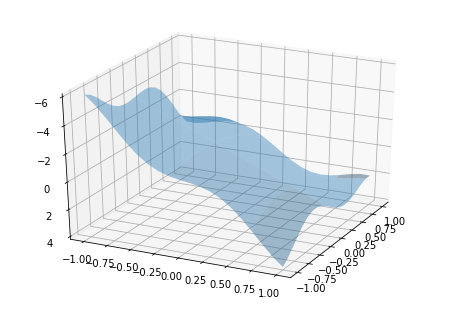

In [12]:
x_f2 = np.linspace(-1, 1, 20)
y_f2 = np.linspace(-1, 1, 20)

XX, YY = np.meshgrid(x_f2, y_f2)

ZZ = XX ** 2 + YY * 2 + 2 * XX * YY * np.cos(np.pi * XX * YY) + XX + YY - 1 

figure = plt.figure()
axis = Axes3D(figure, elev=-152, azim=-26)
_ = axis.plot_surface(XX, YY, ZZ, rstride=8, cstride=9, alpha=0.4)

Tendo noção da função a ser aproximada no espaço tridimensional, é possível agora preparar os dados para serem aplicados na rede neural, com o objetivo de aproximar a função original.

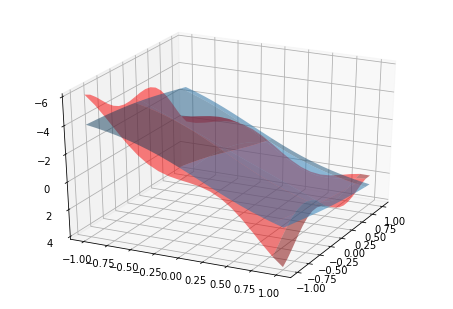

In [13]:
# Organiza os dados para serem colocados na rede neural
data_f2 = np.concatenate((XX.ravel().reshape(-1, 1), YY.ravel().reshape(-1, 1)), axis=1)
target_f2 = ZZ.ravel()

# Separa os dados em conjunto de treinamento e testes
X_train, X_test, y_train, y_test = train_test_split(data_f2, target_f2)

#Criando a rede neural para aproximação
momento = 0.9
clf_f2 = MLPRegressor(hidden_layer_sizes=(20, 30, 20),activation="tanh", solver="sgd", learning_rate="constant", learning_rate_init=0.001, momentum=momento)

# Faz o treinamento da função por batch e calcula o erro de predição a cada batch 
erros = error_convergence(clf_f2, X_train, y_train)

aprox_f2 = clf_f2.predict(data_f2)

# Plotagem da superfície estimada
figure = plt.figure()
axis = Axes3D(figure, elev=-152, azim=-26)

axis.plot_surface(XX, YY, aprox_f2.reshape(20, 20), rstride=9, cstride=9, alpha=0.5)
_ = axis.plot_surface(XX, YY, ZZ, rstride=9, cstride=9, alpha=0.5, color="r")

## Classificação da interseção de semi-circulos

Classificar classes de intersecção e não intersecção entre 4 semi-circulos que possuem centros em:

- (-1, 0)
- (1 , 0)
- (0, -1)
- (0 , 1)

todos com raio de 5 cm. Os dados gerados para cada classe são mostrados abaixo.

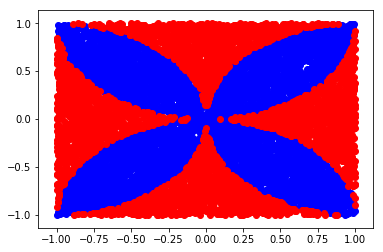

In [14]:
centers = np.array([[-1, 0],
                    [1 , 0],
                    [0 , -1],
                    [0 , 1]])
def is_intersection(sample):
    radius = 1
    count = 0
    for center in centers:
        if np.linalg.norm(sample - center) < radius:
            count += 1
    if count > 1:
        return True
    return False

data = np.random.uniform(-1, 1, size=(10000, 2))
classmask = np.apply_along_axis(is_intersection, 1, data)
classes = classmask.astype(int)

plt.scatter(data[classmask, 0], data[classmask, 1], c='b')
_ = plt.scatter(data[~classmask, 0], data[~classmask, 1], c='r')

Tendo em vista a disposição dos dados acima. Busca-se encontrar um classificador que dado um novo ponto no plano, indique sua classe.

Para isso serão utilizadas os algoritmos, e suas características:

- Rede Perceptron de Multiplas Camadas
 - Ativação: tangente hiperbólica
 - otimização: limited Broyden-Fletcher-Goldfarb-Shanno (L-BFGS)
 - camadas ocultas: 
     - camada 1 -> 30 neuronios, 
     - camada 2 -> 10 neuronios, 
     - camada 3 -> 10 neuronios 
- Uma máquina de vetor de suporte
 - Função de kernel = Radial Basis Function
 - Parâmetro de restrição C = 1000


Score no conjunto de validação para MLP: 0.9806666666666667
Score no conjunto de validação para SVM: 0.92

Matriz de confusão para MLP:
predicao     0     1   All
Real                      
0         1215    41  1256
1           17  1727  1744
All       1232  1768  3000

Matriz de confusão para SVM:
predicao     0     1   All
Real                      
0         1077   179  1256
1           61  1683  1744
All       1138  1862  3000


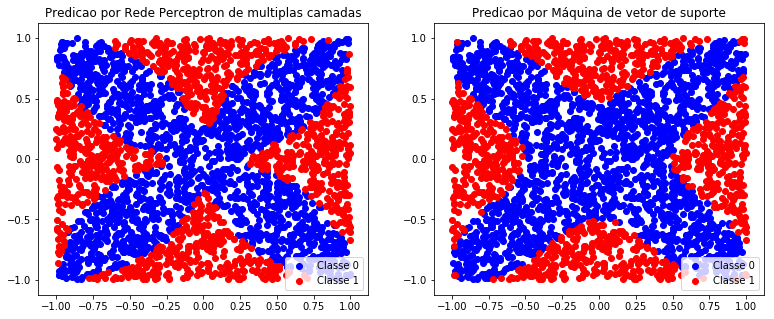

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Cria os classificadores
clf_mlp = MLPClassifier(hidden_layer_sizes=(30, 10, 10), solver="lbfgs", activation="tanh")
clf_svm = SVC(C=1000, kernel='rbf')

# Divide as classes entre treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(data, classes, test_size=0.3) 

# Treina o algoritmo em ambos os classificadores
clf_mlp.fit(X_train, y_train)
clf_svm.fit(X_train, y_train)

# Faz a predição do conjunto de validação para ambas as classes
pred_mlp = clf_mlp.predict(X_test)
pred_svm = clf_svm.predict(X_test)

# Cria uma mascara para indexar o array de dados de acordo com as classes
mlp_mask = pred_mlp.astype(bool)
svm_mask = pred_svm.astype(bool)

fig, ax = plt.subplots(1, 2, figsize=(13, 5))
ax[0].scatter(X_test[mlp_mask, 0], X_test[mlp_mask, 1], c='b')
ax[0].scatter(X_test[~mlp_mask, 0], X_test[~mlp_mask, 1], c='r')
ax[0].set_title("Predicao por Rede Perceptron de multiplas camadas")
ax[0].legend(['Classe 0', 'Classe 1'])

ax[1].scatter(X_test[svm_mask, 0], X_test[svm_mask, 1], c='b')
ax[1].scatter(X_test[~svm_mask, 0], X_test[~svm_mask, 1], c='r')
ax[1].set_title("Predicao por Máquina de vetor de suporte")
ax[1].legend(['Classe 0', 'Classe 1'])

print("Score no conjunto de validação para MLP: {}".format(clf_mlp.score(X_test, y_test)))
print("Score no conjunto de validação para SVM: {}".format(clf_svm.score(X_test, y_test)))

print("\nMatriz de confusão para MLP:")
print(pd.crosstab(y_test, pred_mlp, rownames=['Real'], colnames=['predicao'], margins=True))
print("\nMatriz de confusão para SVM:")
print(pd.crosstab(y_test, pred_svm, rownames=['Real'], colnames=['predicao'], margins=True))

Como pode ser obserado, as predições aproximam bastante as classes iniciais. Porém cada classificador possui suas vantagens e desvantagens:

- A Rede neural MLP necessita de uma configuração maior de seus neuronios e sua função de ativação, caso eles não sejam configurados corretamente, a rede neural pode não convergir.
- A máquina de vetor de suporte necessita de menos configurações para ter uma boa atuação, precisando apenas configurar o parâmetro C para representar a variabilidade dos dados, porém não consegue se adaptar bem as nuances da distribuição dos dados.